# Running Single Agent DQN Trader

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import gymnasium as gym
from utils.utils import split_data
import yfinance as yf

## Get GOOGL and IBM stock prices

In [4]:
ticker1 = 'GOOGL'
ticker2 = 'IBM'

TRAIN_START = '2006-01-01'
TRAIN_END = '2015-12-31'
TEST_START = '2016-01-01'
TEST_END = '2017-12-31'

# Load data
google_data = yf.download(ticker1, start=TRAIN_START, end=TEST_END)
ibm_data = yf.download(ticker2, start=TRAIN_START, end=TEST_END)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


## Plot GOOGL Train and Test Data

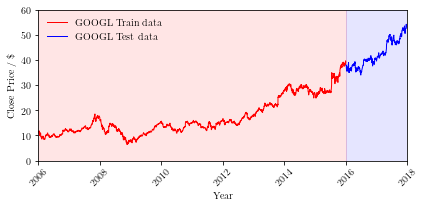

In [46]:
# Latex fonts
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot data over the period
plt.figure(figsize=(6,3))

# Get subset of df for training and testing
google_train = google_data.loc[TRAIN_START:TRAIN_END]
google_test = google_data.loc[TEST_START:TEST_END]

plt.plot(google_train['Close'], label='GOOGL Train data', color='r', linewidth=1)
plt.plot(google_test['Close'], label='GOOGL Test data',color='b', linewidth=1)  

# Shade the training and testing regions
plt.axvspan('2005-01-03 00:00:00', google_train.index[-1], color='r', alpha=0.1)
plt.axvspan(google_test.index[0], '2018-12-31 00:00:00', color='b', alpha=0.1)

# Set xlim to be the same as the training data
plt.xlim(google_train.index[0], google_test.index[-1])
plt.ylim(0, 60)

plt.xticks(rotation=45)

# Set x tick labels
plt.xticks(['2006-01-01', '2008-01-01', '2010-01-01', '2012-01-01', '2014-01-01', '2016-01-01', '2018-01-01'],
           ['2006', '2008', '2010', '2012', '2014', '2016', '2018'])

plt.xlabel('Year')
plt.ylabel('Close Price / \$')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('figures/google.jpg', dpi=600, bbox_inches='tight')
plt.show()

## Plot IBM Train and Test Data

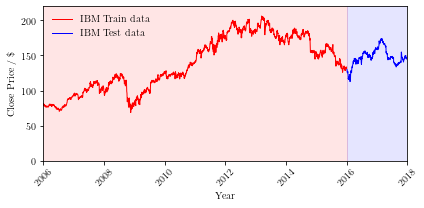

In [48]:
# Plot data over the period
plt.figure(figsize=(6,3))

# Get subset of df for training and testing
ibm_train = ibm_data.loc[TRAIN_START:TRAIN_END]
ibm_test = ibm_data.loc[TEST_START:TEST_END]

plt.plot(ibm_train['Close'], label='IBM Train data', color='r', linewidth=1)
plt.plot(ibm_test['Close'], label='IBM Test data',color='b', linewidth=1)  

# Shade the training and testing regions
plt.axvspan('2005-01-03 00:00:00', ibm_train.index[-1], color='r', alpha=0.1)
plt.axvspan(ibm_test.index[0], '2018-12-31 00:00:00', color='b', alpha=0.1)

# Set xlim to be the same as the training data
plt.xlim(ibm_train.index[0], ibm_test.index[-1])
plt.ylim(0,220)

plt.xticks(rotation=45)

# Set x tick labels
plt.xticks(['2006-01-01', '2008-01-01', '2010-01-01', '2012-01-01', '2014-01-01', '2016-01-01', '2018-01-01'],
           ['2006', '2008', '2010', '2012', '2014', '2016', '2018'])

plt.xlabel('Year')
plt.ylabel('Close Price / \$')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('figures/ibm.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [49]:
# Save dataframes
google_data.to_csv('datasets/GOOGL.csv')
ibm_data.to_csv('datasets/IBM.csv')

## Load action lists from DQN experiment

In [74]:
actions_google = np.loadtxt('actions_GOOGL.csv', delimiter=',')
actions_ibm = np.loadtxt('actions_IBM.csv', delimiter=',')

[2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0.
 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 2.
 2. 2. 0. 0. 0. 2. 0. 0. 0. 0. 2. 2. 0. 2. 0. 0. 2. 0. 0. 0. 0. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 0. 2. 0. 0. 0.
 0. 0. 2. 2. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0.
 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0.
 0. 2. 2. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 2. 0. 2. 2. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 0. 0. 0. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 2.
 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 2. 2. 2.
 2. 2. 0. 2. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.

/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/447459719.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(google_test.index[i], google_test['Close'][i], color='g', marker='^', s=40, zorder=8)
/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/447459719.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(google_test.index[i], google_test['Close'][i], color='r', marker='v', s=40, zorder=8)
/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/447459719.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ve

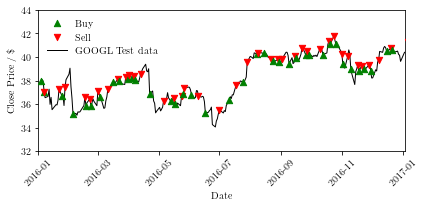

In [148]:
print(actions_google)
print(len(google_test))

# Plot google test data
plt.figure(figsize=(6,3))

colors = ['g', 'b' 'r']

# Color each point based on the action
for i in range(1, len(google_test)):
    if actions_google[i] == 0 and actions_google[i-1] in [1, 2]:
        plt.scatter(google_test.index[i], google_test['Close'][i], color='g', marker='^', s=40, zorder=8)
    elif actions_google[i] == 2 and actions_google[i-1] in [0, 1]:
        plt.scatter(google_test.index[i], google_test['Close'][i], color='r', marker='v', s=40, zorder=8)

plt.scatter(google_test.index[0], google_test['Close'][0], color='g', marker='^', s=40, zorder=10, label='Buy')
plt.scatter(google_test.index[3], google_test['Close'][3], color='r', marker='v', s=40, zorder=10, label='Sell')
plt.plot(google_test['Close'], label='GOOGL Test data', color='black', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Close Price / \$')
plt.legend(frameon=False)

plt.xlim(google_test.index[0], google_test.index[252])
plt.ylim(32,44)
plt.xticks(rotation=45)
plt.xticks(['2016-01-01', '2016-03-01', '2016-05-01', '2016-07-01', '2016-09-01', '2016-11-01', '2017-01-01'],
           ['2016-01', '2016-03', '2016-05', '2016-07', '2016-09', '2016-11', '2017-01'])

plt.tight_layout()
plt.savefig('figures/google_actions.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [89]:
def get_portfolio_value(data, actions, initial_cash=1000):
    cash = initial_cash
    shares = 0
    portfolio_value = []
    own_shares = False

    for i in range(len(data)):
        # If we don't own shares and we buy
        if not own_shares and actions[i] == 0:
            shares = cash / data.iloc[i]['Close']
            cash = 0
            own_shares = True
        # If we own shares and we sell
        elif own_shares and actions[i] == 2:
            cash = shares * data.iloc[i]['Close']
            shares = 0
            own_shares = False

        portfolio_value.append(cash + shares * data.iloc[i]['Close'])

    return portfolio_value

google_portfolio = get_portfolio_value(google_test, actions_google)
ibm_portfolio = get_portfolio_value(ibm_test, actions_ibm)

/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/3133873118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_test['DRL Agent'] = google_portfolio
/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/3133873118.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_test['Buy and Hold'] = buy_and_hold_google_portfolio


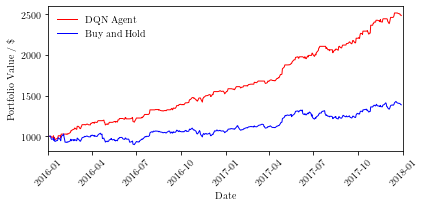

In [108]:
buy_and_hold_actions = np.zeros(len(google_test))
buy_and_hold_google_portfolio = get_portfolio_value(google_test, buy_and_hold_actions)

# Add portfolio values to the dataframe
google_test['DRL Agent'] = google_portfolio
google_test['Buy and Hold'] = buy_and_hold_google_portfolio

plt.figure(figsize=(6,3))

plt.plot(google_test['DRL Agent'], label='DQN Agent', color='r', linewidth=1)
plt.plot(google_test['Buy and Hold'], label='Buy and Hold', color='b', linewidth=1)

# Set xlabels to be the dates
plt.xlim(google_test.index[0], google_test.index[-1])

# Set x tick labels

# Rotate x tick labels
plt.xticks(rotation=45)
plt.xticks(['2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01'],
              ['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04', '2017-07', '2017-10', '2018-01'])

plt.xlabel('Date')
plt.ylabel('Portfolio Value / \$')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('figures/google_portfolio.jpg', dpi=600, bbox_inches='tight')
plt.show()


[2. 2. 2. 1. 1. 2. 1. 0. 1. 0. 2. 1. 2. 1. 1. 1. 0. 1. 2. 2. 1. 2. 2. 2.
 2. 2. 1. 0. 0. 1. 0. 2. 2. 2. 2. 2. 2. 1. 1. 2. 0. 0. 0. 2. 1. 2. 2. 2.
 2. 2. 0. 1. 1. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1. 1. 0. 1. 1. 1. 2. 2. 2.
 2. 0. 0. 2. 1. 1. 1. 2. 2. 1. 1. 0. 0. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 0.
 1. 1. 2. 2. 0. 1. 2. 0. 2. 1. 1. 2. 2. 2. 2. 1. 0. 0. 0. 1. 2. 2. 2. 2.
 1. 0. 0. 1. 2. 2. 2. 2. 2. 2. 0. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 0. 1. 0. 0. 1. 2. 2. 2. 2. 2. 2. 2. 0. 0. 1. 0. 2. 2. 1. 0. 0. 2. 2. 1.
 2. 2. 2. 2. 2. 1. 2. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 2. 2. 2. 2. 0. 0. 0. 0. 2. 1.
 1. 2. 2. 2. 0. 0. 0. 1. 2. 2. 2. 2. 2. 2. 1. 0. 0. 0. 0. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 2. 2. 1. 1. 1. 0. 1. 0. 1. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0. 0.
 1. 1. 2. 2. 2. 2. 2. 0. 0. 0. 1. 1. 2. 2. 2. 2. 0. 1. 2. 2. 2. 1. 2. 2.
 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 0. 1. 1. 0. 0. 2. 2.
 2. 2. 2. 2. 1. 1. 0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0.

/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/221954065.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(ibm_test.index[i],ibm_test['Close'][i], color='r', marker='v', s=40, zorder=10)
/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/221954065.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(ibm_test.index[i], ibm_test['Close'][i], color='g', marker='^', s=40, zorder=10)
/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/221954065.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

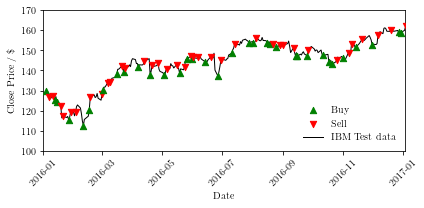

In [143]:
# Plot google test data
plt.figure(figsize=(6, 3))
print(actions_ibm)

colors = ['g', 'b' 'r']

# Color each point based on the action
for i in range(1, len(ibm_test)):
    if actions_ibm[i] == 0 and actions_ibm[i-1] in [1, 2]:
        plt.scatter(ibm_test.index[i], ibm_test['Close'][i], color='g', marker='^', s=40, zorder=10)
    elif actions_ibm[i] == 2 and actions_ibm[i-1] in [0, 1]:
        plt.scatter(ibm_test.index[i],ibm_test['Close'][i], color='r', marker='v', s=40, zorder=10)

plt.scatter(ibm_test.index[0], ibm_test['Close'][0], color='g', marker='^', s=40, zorder=10, label='Buy')
plt.scatter(ibm_test.index[3], ibm_test['Close'][3], color='r', marker='v', s=40, zorder=10, label='Sell')
plt.plot(ibm_test['Close'], label='IBM Test data', color='black', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Close Price / \$')
plt.legend(frameon=False)

plt.xlim(ibm_test.index[0], ibm_test.index[252])
plt.ylim(100,170)
plt.xticks(rotation=45)
plt.xticks(['2016-01-01', '2016-03-01', '2016-05-01', '2016-07-01', '2016-09-01', '2016-11-01', '2017-01-01'],
           ['2016-01', '2016-03', '2016-05', '2016-07', '2016-09', '2016-11', '2017-01'])

plt.tight_layout()
plt.savefig('figures/ibm_actions.jpg', dpi=600, bbox_inches='tight')
plt.show()

/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/3272377164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_test['DRL Agent'] = ibm_portfolio
/var/folders/vh/w6fkknsn2vl_2cc14cwzv18w0000gn/T/ipykernel_59189/3272377164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_test['Buy and Hold'] = buy_and_hold_ibm_portfolio


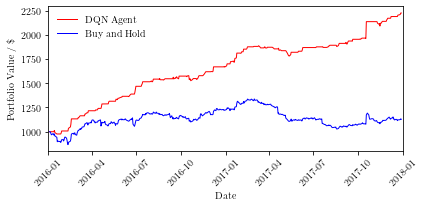

In [107]:
buy_and_hold_actions = np.zeros(len(ibm_test))
buy_and_hold_ibm_portfolio = get_portfolio_value(ibm_test, buy_and_hold_actions)

# Add portfolio values to the dataframe
ibm_test['DRL Agent'] = ibm_portfolio
ibm_test['Buy and Hold'] = buy_and_hold_ibm_portfolio

plt.figure(figsize=(6,3))

plt.plot(ibm_test['DRL Agent'], label='DQN Agent', color='r', linewidth=1)
plt.plot(ibm_test['Buy and Hold'], label='Buy and Hold', color='b', linewidth=1)

# Set xlabels to be the dates
plt.xlim(ibm_test.index[0], ibm_test.index[-1])

# Set x tick labels

# Rotate x tick labels
plt.xticks(rotation=45)
plt.xticks(['2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01'],
              ['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04', '2017-07', '2017-10', '2018-01'])

plt.xlabel('Date')
plt.ylabel('Portfolio Value / \$')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('figures/ibm_portfolio.jpg', dpi=600, bbox_inches='tight')
plt.show()